In response to reviewer #2 suggestion to add more downstream analyses options. 

Take the L-R factor loading values and run an enrichment analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

import cell2cell as c2c

import os
import sys
sys.path.insert(1, os.path.abspath(os.curdir))
from utility import loading_ora

seed = 888
np.random.seed(seed)
data_path = '/data3/hratch/tc2c_analyses_1/natcomm_revisions/'

In [2]:
# read in loadings (CodeOcean script 06, results/COVID-19/BALF-loadings.xlsx)
loadings = pd.read_excel(data_path + 'processed/BALF-Loadings.xlsx', 
                        sheet_name = 'LRs', index_col = 0)
# balf_tensor = c2c.io.load_variable_with_pickle(data_path + 'processed/Tensor-BALF.pkl')
# # get the joint distribution between sender cells and LR pair loadings for factor 8
# joint_dis_send = get_joint_loadings(balf_tensor, dim1 = 'LRs', dim2 = 'Sender', 
#                               factor = 8)

Reviewer specifically suggests analyzing loadings for Factor 8

In [3]:
factor8 = loadings['Factor 8']
factor8 = factor8.sort_values(ascending = False)

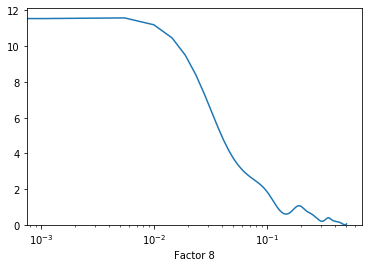

In [4]:
fig, ax = plt.subplots()
g = sns.distplot(factor8, ax = ax, hist = False)
ax.set_xscale('log')

In [5]:
# get the lr pairs
lr_pairs = pd.read_csv('https://raw.githubusercontent.com/LewisLabUCSD/Ligand-Receptor-Pairs/master/Human/Human-2020-Jin-LR-pairs.csv')

int_columns = ('ligand_symbol', 'receptor_symbol')
lr_pairs = c2c.preprocessing.ppi.remove_ppi_bidirectionality(ppi_data=lr_pairs, 
                                                             interaction_columns=int_columns
                                                             )
# map lr pairs to their annotated pathway
lr_functions = defaultdict(list)
for idx, row in lr_pairs.iterrows():
    ppi_label = row[int_columns[0]] + '^' + row[int_columns[1]]
    lr_functions[row['pathway_name']].append(ppi_label)


Removing bidirectionality of PPI network


In [7]:
ora_res = loading_ora(lr_loadings=loadings['Factor 8'], 
           lr_functions=lr_functions, 
           percentile = 0.9)

In [8]:
enriched = ora_res[ora_res.BH_FDR <= 0.1]
print('Of the {} signalling pathways considered, {} are enriched (FDR <= 0.1)'.format(ora_res.shape[0], enriched.shape[0]))

Of the 226 signalling pathways considered, 3 are enriched (FDR <= 0.1)


In [9]:
enriched

,Term,Gene Ratio,BG Ratio,p_val,BH_FDR
20,CCL,0.473684,0.033216,0.0,0.0
61,SPP1,0.263158,0.004529,0.0,0.000001
110,ANNEXIN,0.105263,0.001007,0.000087,0.006529
